## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#determine appropriate 
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset (inner)
merged_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')
#display
merged_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice in the DataFrame.
mice_number = len(merged_data['Mouse ID'].value_counts())
print(f'The number of Mice in the study is: {mice_number}')
#merged_data['Mouse ID'].value_counts()

The number of Mice in the study is: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
# create a clean data frame without duplicates
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]
#checking differences in data frames after clean up
clean_merged_data['Mouse ID'].value_counts()

p136    10
a963    10
p189    10
k382    10
y478    10
        ..
x226     1
v199     1
t573     1
u153     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# create a clean data frame without duplicates
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_data['Mouse ID'].value_counts())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = clean_merged_data.groupby(['Drug Regimen'])
drug_data.head()
#means of all drugs
tumor_mean = drug_data['Tumor Volume (mm3)'].mean()
#medians
tumor_median = drug_data['Tumor Volume (mm3)'].median()
#variance
var_data = clean_merged_data.groupby(['Drug Regimen']).var()
var_tumor = var_data['Tumor Volume (mm3)']
#standard deviation
std_data = clean_merged_data.groupby(['Drug Regimen']).std()
std_tumor = std_data['Tumor Volume (mm3)']
std_tumor
#Stardard Error of the Mean
SEM_data = clean_merged_data.groupby(['Drug Regimen']).sem()
SEM_tumor = SEM_data['Tumor Volume (mm3)']
SEM_tumor
# This method is the most straightforward, creating multiple series and putting them all together at the end.
tumor_df = pd.DataFrame({'Tumor Vol Mean':tumor_mean,'Tumor Vol Median':tumor_median,
                        'Tumor Vol Variance':var_tumor,'Tumor Vol Std Dev':std_tumor,
                        'Tumor Vol SEM':SEM_tumor})
tumor_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 1.0, 'Number of Data Points for Each Drug Regimen')

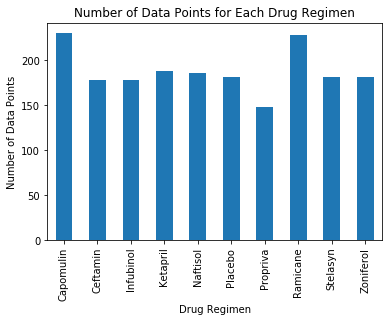

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#create data for bar plot
mice_count = drug_data['Mouse ID'].count()
drug_count = merged_data['Drug Regimen'].value_counts()

#plot
pandas_mice_bar = mice_count.plot.bar()
pandas_mice_bar.set_xlabel("Drug Regimen")
pandas_mice_bar.set_ylabel("Number of Data Points")
pandas_mice_bar.set_title("Number of Data Points for Each Drug Regimen")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

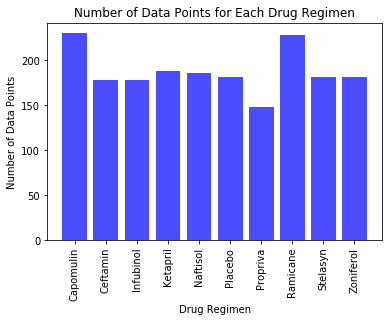

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#pyplot graph
study_barplot = plt.bar(mice_count.index,mice_count, color='b', alpha = 0.7, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation='vertical')

## Pie Plots

Text(0.5, 1.0, 'Distribution of Female Versus Male Mice')

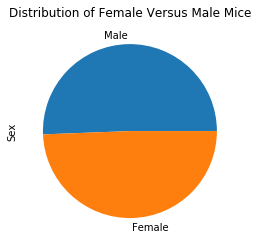

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_data['Sex'].value_counts()
#print(gender)
gender_pie = gender.plot.pie()
gender_pie.set_title("Distribution of Female Versus Male Mice")


Text(0, 0.5, 'Sex')

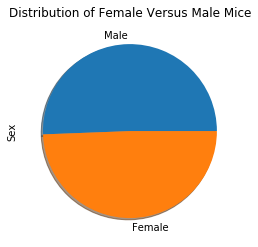

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index

plt.pie(gender,labels=labels,shadow=True, startangle=0)
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#make a table for the top 4 drugs
short_drug = merged_data[['Drug Regimen','Tumor Volume (mm3)','Timepoint']]
top_45 = short_drug.loc[short_drug['Timepoint'] == 45]

#filterfor timpoint = 45 for tumor volume 
top_cap = top_45.loc[(top_45['Drug Regimen'] == 'Capomulin')]['Tumor Volume (mm3)']
top_ram = top_45.loc[top_45['Drug Regimen'] =='Ramicane']['Tumor Volume (mm3)']
top_inf = top_45.loc[top_45['Drug Regimen'] =='Infubinol']['Tumor Volume (mm3)']
top_cef = top_45.loc[top_45['Drug Regimen'] =='Ceftamin']['Tumor Volume (mm3)']
#make table:
#top_table = pd.DataFrame[{'Final Tumor Size: Capomulin':top_cap,
#             'Final Tumor Size: Ramincane':top_ram,
#             'Final Tumor Size: Infubinol':top_inf,
#             'Final Tumor Size: Ceftamin':top_cef}]
#IQR: 
quart_cap = top_cap.quantile([.25,.5,.75])
quart_ram = top_ram.quantile([.25,.5,.75])
quart_inf = top_inf.quantile([.25,.5,.75])
quart_cef = top_cef.quantile([.25,.5,.75])
#outliers:
#blot

47.68596303

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#generate data
trunc_data = merged_data[['Drug Regimen','Tumor Volume (mm3)','Mouse ID','Timepoint']]
#filter by Drug then take data for 1 mouse only - l509
cap_data = trunc_data.loc[trunc_data['Drug Regimen'] == 'Capomulin']
m_cap_data = cap_data.loc[cap_data['Mouse ID'] == 'l509']
#generate line plot:
plt.plot(m_cap_data['Timepoint'],)

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Timepoint
371,Capomulin,45.000000,l509,0
372,Capomulin,45.851193,l509,5
373,Capomulin,46.759074,l509,10
374,Capomulin,47.488599,l509,15
375,Capomulin,48.070452,l509,20
376,Capomulin,44.006257,l509,25
377,Capomulin,44.708055,l509,30
378,Capomulin,40.207289,l509,35
379,Capomulin,40.770813,l509,40
380,Capomulin,41.483008,l509,45


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
